In [212]:
# import argparse
# import sys
# import praw
# import prawcore
# import shutil
# import subprocess
# import os
# import errno
# import my_util
import random
import my_util as u
import pandas as pd
from math import floor
from my_util import gallery_first_image, url_to_img, post_info, nmsce

In [5]:
# Moved into my_util.py

# Reddit object with my app credentials
# reddit = praw.Reddit( \
#     client_id='VZDFQR1wT8giqAVcq09UmQ', \
#     client_secret='27AnuMqvvV6CbxekJspgAyxD4UYThw', \
#     user_agent='nms-screenshot-scraper', \
#     username='nms_cartographer', \
#     password='y1C1FMt2X9mu')

# Subreddit object for searching
# nmsce = reddit.subreddit('NMSCoordinateExchange')

In [6]:
# Moved into my_util.py

# class post_info():
#     """ Simple class holding a subset of 'PRAW.submission' attributes 
#     """

#     def __init__(self, post):
#         self.url = post.url
#         self.post_id = post.id
#         self.title = post.title
#         self.author_id = post.author.id
#         self.author_name = post.author.name
#         self.upvotes = post.score
#         self.flair_text = post.link_flair_text
#         if self.url.split("/")[-2] == "gallery":
#             self.url = gallery_first_image(self.url)

## Get post set  

This is not fast. Broken into 3 blocks for easier repeating of individual parts

In [11]:
# limit = 250
# period = 'year' # 'day' 'month' 'week' 'year'

# found_posts = nmsce.search(query='flair:euclid', sort="new", time_filter=period)
# posts = [post.url for post in found_posts]

# posts = [post_info(post) for post in nmsce.search(query='flair:Starship/Euclid', sort="new", time_filter=period, limit=limit)]

# posts = [post_info(post) for post in nmsce.search(query='flair:euclid', sort="new", time_filter=period, limit=limit)]
# posts.append([post_info(post) for post in nmsce.search(query='flair:euclid', sort="new", time_filter=period, limit=limit)])



# Pulling training posts from another popular galaxy will facilitate distinct train/test sets
# posts = [post_info(post) for post in nmsce.search(query='flair:Eissentam', sort="new", time_filter=period, limit=limit)]

# Larger distinct sets can be obtained by combining mutually exclusive flair categories from the same galaxy

# posts = [post_info(post) for post in nmsce.search(query='flair:Starship/Eissentam', sort="new", time_filter=period, limit=limit)]
# posts.append([post_info(post) for post in nmsce.search(query='flair:Fauna/Eissentam', sort="new", time_filter=period, limit=limit)])
# posts.append([post_info(post) for post in nmsce.search(query='flair:Planet/Eissentam', sort="new", time_filter=period, limit=limit)])

# posts = [post_info(post) for post in nmsce.search(query='flair:Multitool/Eissentam', sort="new", time_filter=period, limit=limit)]
# posts = [post_info(post) for post in nmsce.search(query='flair:Base/Eissentam', sort="new", time_filter=period, limit=limit)]

In [48]:
class post_info():
    """ Simple class holding a subset of 'PRAW.submission' attributes 
    """

    def __init__(self, post):
        """Constructor
        """
        self.post_id = post.id
        self.title = post.title
        try:
            self.author_id = post.author.id
            self.author_name = post.author.name
        except:            
            self.author_id = "-1"
            self.author_name = "deleted"
        self.upvotes = post.score
        self.flair_text = post.link_flair_text
        self.url = post.url
        if self.url.split("/")[-2] == "gallery":
            self.url = gallery_first_image(self.url)
        # self.address = post.address
        self.address = "000000000000"
    
    def to_dict(self):
        """Extracts attributes to dictionary
        """
        return {
            'post_id': self.post_id,
            'title': self.title,
            'author_id': self.author_id,
            'author_name': self.author_name,
            'upvotes': self.upvotes,
            'flair_text': self.flair_text,
            'subject' : self.flair_text.split("/")[0],
            'galaxy' : self.flair_text.split("/")[1],
            'update' : self.flair_text.split("/")[2],
            'url': self.url,            
            'address': self.address,
            'body_index_h': int(self.address[0], 16), # Convert from hex string to integer value
            'sys_index_h': int(self.address[1:4], 16),
            'region_y_h': int(self.address[4:6], 16),
            'region_z_h': int(self.address[6:9], 16),
            'region_x_h': int(self.address[9:], 16) 
        }

In [49]:
limit = 250
period = 'year' # 'day' 'month' 'week' 'year'
posts = [post_info(post) for post in nmsce.search(query='flair:Starship/Eissentam', sort="new", time_filter=period, limit=limit)]
len(posts)

249

In [50]:
[posts.append(post_info(post)) for post in nmsce.search(query='flair:Fauna/Eissentam', sort="new", time_filter=period, limit=limit)]
len(posts)

492

In [51]:
[posts.append(post_info(post)) for post in nmsce.search(query='flair:Planet/Eissentam', sort="new", time_filter=period, limit=limit)]
len(posts)

737

In [54]:
# pd.DataFrame.from_records([post.to_dict() for post in posts])
df = pd.DataFrame.from_records([post.to_dict() for post in posts])
convert_dict = {
    "address": int,
    "body_index_h": int,
    "sys_index_h": int,
    "region_y_h": int,
    "region_z_h": int,
    "region_x_h": int
}
df = df.astype(convert_dict)
df.dtypes

post_id         object
title           object
author_id       object
author_name     object
upvotes          int64
flair_text      object
subject         object
galaxy          object
update          object
url             object
address          int32
body_index_h     int32
sys_index_h      int32
region_y_h       int32
region_z_h       int32
region_x_h       int32
dtype: object

In [69]:
df

,post_id,title,author_id,author_name,upvotes,flair_text,subject,galaxy,update,url,address,body_index_h,sys_index_h,region_y_h,region_z_h,region_x_h
0,ygxpws,yellow Spider Solar / Verta / Talon / green He...,8tocnt1q,rey_rey1988,1,Starship/Eissentam/4,Starship,Eissentam,4,https://preview.redd.it/qmtyh02attw91.jpg?widt...,0,0,0,0,0,0
1,ygs3pa,Red/White/Dark Chrome Box Shuttle w/ Voyager w...,5dxpkfmn,Ape3po,15,Starship/Eissentam/4,Starship,Eissentam,4,https://preview.redd.it/ipnrln6gmsw91.jpg?widt...,0,0,0,0,0,0
2,ygj9mj,Clean fighter in light grey / tan in Eissentam...,lp64usj4,Zeelleerr,11,Starship/Eissentam/4,Starship,Eissentam,4,https://preview.redd.it/4wekrdi2vqw91.jpg?widt...,0,0,0,0,0,0
3,yg5cur,Light Blue/Sky Blue Explorer. I love the color...,zcylt,Thormeaxozarliplon,6,Starship/Eissentam/4,Starship,Eissentam,4,https://i.redd.it/uc7slo805nw91.jpg,0,0,0,0,0,0
4,yg3pf3,"Chrome Blue and Red Fighter, Barrel, Droid + T...",9bzqi08s,Mycatgotwhamied,3,Starship/Eissentam/4,Starship,Eissentam,4,https://preview.redd.it/m40apov4rmw91.jpg?widt...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,t2btxx,Paradise plant with blue and orange grass. Ton...,ai6aswdy,Secret-Sock7928,38,Planet/Eissentam/3.82,Planet,Eissentam,3.82,https://preview.redd.it/usjdpox7x9k81.png?widt...,0,0,0,0,0,0
733,t0t16h,Paradise planet near eissentam core. Complete ...,ai6aswdy,Secret-Sock7928,9,Planet/Eissentam/3.82,Planet,Eissentam,3.82,https://preview.redd.it/63gs5l9m9wj81.png?widt...,0,0,0,0,0,0
734,szz96j,Eissentam: Welcome to Baja Blast Beta! Teal lu...,iwx1xa90,AstralCryptid420,16,Planet/Eissentam/3.82,Planet,Eissentam,3.82,https://preview.redd.it/8pyyoh9ixoj81.png?widt...,0,0,0,0,0,0
735,szymx4,Eissentam: Welcome to Grape Bubblegum! Purple ...,iwx1xa90,AstralCryptid420,16,Planet/Eissentam/3.82,Planet,Eissentam,3.82,https://preview.redd.it/7i0kxl8wjoj81.png?widt...,0,0,0,0,0,0


In [221]:
path = "C:\\Users\\derek\\Dropbox\\Back to School\\Chico State\\Courses\\2022 Fall\\CSCI 490 Capstone\\capstone-nms-galactic-map\\test_scripts\\post_data\\df_eissentam_11_2.csv"
df.to_csv(path)

In [64]:
df.groupby(['author_name']).author_name.count().sort_values(ascending=False)

author_name
rey_rey1988           150
EcoCheung              41
Jensen_Explorer        15
RangerNational7955     14
Redgoatea              13
                     ... 
Midice                  1
MisterAkimo             1
MithroFussac            1
Mosey_9                 1
zunashi                 1
Name: author_name, Length: 296, dtype: int64

<AxesSubplot: >

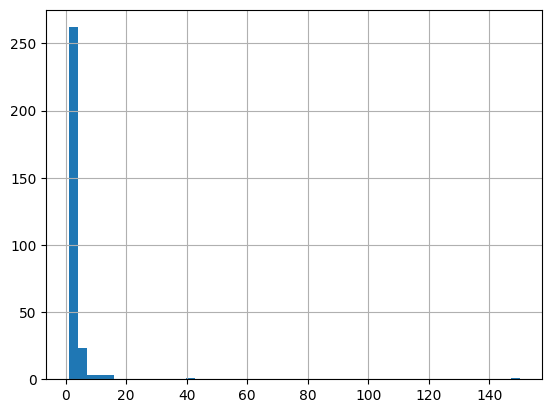

In [65]:
df.groupby(['author_name']).author_name.count().hist(bins=50)

In [67]:
df.groupby(['author_id']).author_id.count().sort_values(ascending=False)

author_id
8tocnt1q    150
4a2s0e76     41
adhr4atb     15
iljg8gsb     14
ry56eyni     13
           ... 
8t9uc8or      1
107t2o        1
90p99gge      1
92rbr48n      1
8vrs1mu2      1
Name: author_id, Length: 296, dtype: int64

In [71]:
# df.url
print(df.url)
# count = 0
# for post in df:    
#     count += 1
#     print("[%03d]"%count, "url:", post.url)
#     # if post.url.split("/")[-2] == "gallery":
#     #     print("url:", post.url)
#     #     print("flair:", post.flair_text)

0      https://preview.redd.it/qmtyh02attw91.jpg?widt...
1      https://preview.redd.it/ipnrln6gmsw91.jpg?widt...
2      https://preview.redd.it/4wekrdi2vqw91.jpg?widt...
3                    https://i.redd.it/uc7slo805nw91.jpg
4      https://preview.redd.it/m40apov4rmw91.jpg?widt...
                             ...                        
732    https://preview.redd.it/usjdpox7x9k81.png?widt...
733    https://preview.redd.it/63gs5l9m9wj81.png?widt...
734    https://preview.redd.it/8pyyoh9ixoj81.png?widt...
735    https://preview.redd.it/7i0kxl8wjoj81.png?widt...
736                  https://i.redd.it/1wp4tkwbjoj81.png
Name: url, Length: 737, dtype: object


In [79]:
# Get random url from df
i = random.randint(0, len(df))
df.url[i]

'https://i.redd.it/nanh0tz30hq91.jpg'

In [80]:
# Use get 5 random images from df.url

for i in range(5):
    i = random.randint(0, len(df))    
    url = df.url[i]
    # post = posts[i]
    print("index:[%03d]"%i)
    print("url:", url)
    try:
        url_to_img(url).show()
    except:
        print("Error with image")

index:[310]
url: https://preview.redd.it/ce84zj710jm91.jpg?width=3840&format=pjpg&auto=webp&s=f12008cf096d6c92cb155bfd860ced8a0351b587
index:[065]
url: https://i.redd.it/zuyttln31et91.jpg
index:[043]
url: https://www.reddit.com/r/NMSCoordinateExchange/comments/y5w4vk/pure_white_fighter_t2_system/
Error with image
index:[712]
url: https://i.redd.it/pnu2zsjm62p81.jpg
index:[638]
url: https://preview.redd.it/zs1tekowrs091.png?width=1920&format=png&auto=webp&s=b8572c37f38d159181f61d52895d06fe5cb41892


In [27]:
post = posts[0]
print("index:[000]")
print("url:", post.url)
try:
    url_to_img(post.url).show()
except:
    print("Error with image")

index:[000]
url: https://i.redd.it/uc7slo805nw91.jpg


In [28]:
# count = 0
for i in range(5):    
    post = posts[i]
    print("index:[%03d]"%i)
    print("url:", post.url)
    try:
        url_to_img(post.url).show()
    except:
        print("Error with image")

index:[000]
url: https://i.redd.it/uc7slo805nw91.jpg
index:[001]
url: https://preview.redd.it/m40apov4rmw91.jpg?width=3840&format=pjpg&auto=webp&s=c643fb2381c1dab370654f2fc9ea9a188e3be5a0
index:[002]
url: https://www.reddit.com/r/NMSCoordinateExchange/comments/yfbwbm/i_dont_know_the_exact_specifications_but_it_looks/
Error with image
index:[003]
url: https://preview.redd.it/w8l1tmsrffw91.jpg?width=3840&format=pjpg&auto=webp&s=d3240dc3090b3bfa3834db91caff265ea1502cb1
index:[004]
url: https://i.redd.it/sepq9zkvsfw91.jpg


In [20]:
# import re
# import urllib.request
# from PIL import Image

# def gallery_first_image(gallery_url):
#     """Gets first image from a reddit gallery post
#     """
#     submission = reddit.submission(url = gallery_url)
#     image_dict = submission.media_metadata
#     return re.sub('width=[0-9]+', 'width=1920', list(image_dict.values())[0]['s']['u'])

# def url_to_img(url):
#     """Use pillow to create a pillow.image object from a url
#     """
#     ext = url.split(".")[-1].split("?")[0]
#     temp = "temp." + ext
#     urllib.request.urlretrieve(url, temp)
#     return Image.open(temp)


In [21]:
# gallery_url  = 'https://www.reddit.com/gallery/ybtk0e'
# image_url = gallery_first_image(gallery_url)
# img = url_to_img(image_url)
# img.show()

In [22]:
# Development code, for reference only

# import re
# import urllib.request
# from PIL import Image

# gallery_url  = 'https://www.reddit.com/gallery/ybtk0e'
# submission = reddit.submission(url = gallery_url)
# image_dict = submission.media_metadata
# for image_item in image_dict.values():
#     largest_image = image_item['s']
#     image_url = largest_image['u']
#     url_1080 = re.sub('width=[0-9]+', 'width=1920', image_url)
#     urllib.request.urlretrieve(url_1080,"image.png")  
#     img = Image.open("image.png")
#     img.show()
# values = list(image_dict.values())[0]
# largest_image = values ['s']
# image_url = largest_image['u']
# url_1080 = re.sub('width=[0-9]+', 'width=1920', image_url)
# urllib.request.urlretrieve(url_1080,"image.png")  
# img = Image.open("image.png")
# img.show()

# url_1080 = re.sub('width=[0-9]+', 'width=1920', list(image_dict.values())[0]['s']['u'])
# print(re.sub('width=[0-9]+', 'width=1920', list(image_dict.values())[0]['s']['u']))

In [32]:
print("id , title , url , flair")
for post in posts:
    # print("------------")
    # print("id:", post.post_id)
    # print("title:", post.title[:64])
    # print("url:", post.url)
    # print("flair:", post.flair_text)
    print(post.post_id,",", post.title[:64],",", post.url,",", post.flair_text)

id , title , url , flair
yg5cur , Light Blue/Sky Blue Explorer. I love the colors, but not the lay , https://i.redd.it/uc7slo805nw91.jpg , Starship/Eissentam/4
yg3pf3 , Chrome Blue and Red Fighter, Barrel, Droid + Tie Wings, Triple T , https://preview.redd.it/m40apov4rmw91.jpg?width=3840&format=pjpg&auto=webp&s=c643fb2381c1dab370654f2fc9ea9a188e3be5a0 , Starship/Eissentam/4
yfbwbm , I dont know the exact specifications but it looks nice. Planet H , https://www.reddit.com/r/NMSCoordinateExchange/comments/yfbwbm/i_dont_know_the_exact_specifications_but_it_looks/ , Starship/Eissentam/4
yf5x7q , 4 adjacent supercharged slot L/ Blue and Tan Jetfighter/ Box/ St , https://preview.redd.it/w8l1tmsrffw91.jpg?width=3840&format=pjpg&auto=webp&s=d3240dc3090b3bfa3834db91caff265ea1502cb1 , Starship/Eissentam/4
yf06tk , purple and chrome Raven Solar / Drill / Double Blade / green Rec , https://i.redd.it/sepq9zkvsfw91.jpg , Starship/Eissentam/4
yey97z , red and brown Grouper Solar / Drill / Grapple / r

## Process Scraped Images Into Training Glyphs

#### Save Glyph Addresses  

Need to crop images down to just the glyph address and save them.

In [84]:
from PIL import Image

In [114]:
path_root = "C:\\Users\\derek\\Dropbox\\Back to School\\Chico State\\Courses\\2022 Fall\\CSCI 490 Capstone\\capstone-nms-galactic-map\\test_scripts\\test_images\\addr\\"
i = random.randint(0, len(df))    
url = df.url[i]
print("index:[%03d]"%i)
print("url:", url)
try:
    im = url_to_img(url)
    width, height = im.size
    print("Width:", width, "Height:", height)
    # print("Cropped Size")
    glyph_side = width / 60
    left = glyph_side * (1/3)
    top = height-(2*glyph_side)
    right = glyph_side*(12 + (1/3))
    bottom = height-glyph_side
    im1 = im.crop((left, top, right, bottom))
    # im1.show()    
    addr_size = (12*64, 64) # Resize address to be the size it is with 4k captures
    im2 = im1.resize(size=addr_size, resample=Image.Resampling.LANCZOS)
    # im2.show()    
    # print(df.post_id[i])
    path = path_root + df.post_id[i] + ".png"
    print("Path:", path)
    # print("Path:", path)
    # im2 = im1.resize(size=addr_size, resample=Image.Resampling.BICUBIC)
    # im2.show()    
    im2.save(path)
except:
    print("Error with image")

index:[707]
url: https://preview.redd.it/vi9ynjln36r81.jpg?width=2560&format=pjpg&auto=webp&s=271ab4b35225edef3dc49bcbed28b90572ce150d
Width: 2560 Height: 1440
Path: C:\Users\derek\Dropbox\Back to School\Chico State\Courses\2022 Fall\CSCI 490 Capstone\capstone-nms-galactic-map\test_scripts\test_images\addr\tur659.png


In [86]:
# Use get 5 random images from df.url
path_root = "C:\\Users\\derek\\Dropbox\\Back to School\\Chico State\\Courses\\2022 Fall\\CSCI 490 Capstone\\capstone-nms-galactic-map\\test_scripts\\test_images\\addr\\"
for i in range(10):
    i = random.randint(0, len(df))    
    url = df.url[i]
    print("index:[%03d]"%i)
    print("url:", url)
    try:
        im = url_to_img(url)
        width, height = im.size
        print("Width:", width, "Height:", height)
        im.show()
        if width != 1920:
            img = im.resize(size=(1920, 1080),resample=Image.BICUBIC)
            width, height = im.size
            print("Image Resized")
            print("Width:", width, "Height:", height)
            im.show()
    except:
        print("Error with image")

index:[337]
url: https://i.redd.it/nysd40ioshj91.png
Width: 1920 Height: 1080
index:[064]
url: https://i.redd.it/xw7vxhizlft91.jpg
Width: 3840 Height: 2160


C:\Users\derek\AppData\Local\Temp\ipykernel_15592\1430151658.py:15: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  img = im.resize(size=(1920, 1080),resample=Image.BICUBIC)


Image Resized
Width: 3840 Height: 2160
index:[642]
url: https://i.redd.it/isg72oudq4091.jpg
Width: 3840 Height: 2160
Image Resized
Width: 3840 Height: 2160
index:[196]
url: https://preview.redd.it/8ke7c73afkp91.jpg?width=3840&format=pjpg&auto=webp&s=ba5572e7291fb85eebc82f29197c1e4d3c217561
Width: 3840 Height: 2160
Image Resized
Width: 3840 Height: 2160
index:[477]
url: https://i.redd.it/4wi5rqz5cj491.png
Width: 1707 Height: 961
Image Resized
Width: 1707 Height: 961


In [218]:
df.shape[0]

737

In [219]:
# Use get 5 random images from df.url
path_root = "C:\\Users\\derek\\Dropbox\\Back to School\\Chico State\\Courses\\2022 Fall\\CSCI 490 Capstone\\capstone-nms-galactic-map\\test_scripts\\test_images\\addr\\"
threshold_increment = .05
min_ratio = 7
max_ratio = 15
min_threshold = 128
max_threshold = 254
for i in range(df.shape[0]):
# for i in range(50):
    threshold = 200
    # index = random.randint(0, len(df)-1)    
    index = i
    url = df.url[index]
    # print("index:[%03d]"%index, end="\t")
    print()
    print("[%03d]"%index, end="\t")
    # print("url:", url)
    try:
        im = url_to_img(url)
        width, height = im.size
        if width / height == 16/9:
            print(width, "x", height, end="\t")
            # print("Cropped Size")
            glyph_side = width / 60
            left = glyph_side * (1/3)
            top = height-(2*glyph_side)
            right = glyph_side*(12 + (1/3))
            bottom = height-glyph_side
            im1 = im.crop((left, top, right, bottom))
            addr_size = (12*64, 64) # Resize address to be the size it is with 4k captures
            im2 = im1.resize(size=addr_size, resample=Image.Resampling.LANCZOS)
            im3 = im2.convert("L")   
            # im4= im3.point( lambda p: 255 if p > threshold else 0 )
            # hist = im4.histogram()
            # ratio = hist[0]/hist[-1]
            # im4.show()
            try:
                im4= im3.point( lambda p: 255 if p > threshold else 0 )
                hist = im4.histogram()
                ratio = hist[0]/hist[-1]
                # im4.show()
                # print("B:W=", ratio, end="\t")
                # print("B:W=%.1f\t"%ratio, end="\t")
                print("\tT: %d, B:W=%.1f\t"%(threshold, ratio), end="")
                # path = path_root + "%03d_"%index + df.post_id[i] + "_t%d"%threshold + "_r%d"%floor(ratio) + ".png"
                path = path_root + "%03d_%s_t%d_r%d.png"%(index, df.post_id[i], threshold, floor(ratio))
                # print(path, "\t")
                im4.save(path)
                if (ratio > max_ratio):
                    print("Too Dark")
                if (ratio < min_ratio):
                    print("Too Light")
                while ratio > max_ratio or ratio < min_ratio:
                    if (ratio > max_ratio):
                        # print("Too Dark")
                        threshold *= (1-threshold_increment)
                    else:                
                        # print("Too Light")
                        threshold *= (1+threshold_increment)
                        # threshold += threshold_increment
                    if threshold < min_threshold:
                        print("Threshold too low")
                        raise ValueError
                    if threshold > max_threshold:
                        print("Threshold too high")
                        raise ValueError
                    im4= im3.point( lambda p: 255 if p > threshold else 0 )
                    # im4.show()
                    hist = im4.histogram()
                    ratio = hist[0]/hist[-1]
                    # print("\tT: %d, B:W=%.1f\t"%(threshold, ratio), end="")
                    path = path_root + "%03d_%s_t%d_r%d.png"%(index, df.post_id[i], threshold, floor(ratio))
                    # path = path_root + df.post_id[i] + "_%d"%threshold + "_r%d"%floor(ratio) + ".png"
                    # print(path, "\t")
                    # im4.show()
                    # im4.save(path)
            except ZeroDivisionError:
                ratio = -1
                print("Error with image. Zero division.")
            print("\tT: %d, B:W=%.1f\t"%(threshold, ratio), end="")
            im4.save(path)
        else:
            print("Improper aspect ratio, image skipped.")
    except:
        print("Error with image. End")


# Probably Too Dark: 31, 27, 19, 32, 20, 26
# Lowest Good Ratio: 8.5


[000]	3840 x 2160		T: 200, B:W=3.0	Too Light
	T: 220, B:W=7.3	
[001]	1920 x 1080		T: 200, B:W=944.2	Too Dark
Threshold too low
Error with image. End

[002]	3840 x 2160		T: 200, B:W=9.4		T: 200, B:W=9.4	
[003]	1920 x 1080		T: 200, B:W=10.6		T: 200, B:W=10.6	
[004]	3840 x 2160		T: 200, B:W=109.2	Too Dark
Threshold too low
Error with image. End

[005]	Error with image. End

[006]	3840 x 2160		T: 200, B:W=5.8	Too Light
	T: 220, B:W=8.4	
[007]	3840 x 2160		T: 200, B:W=9.9		T: 200, B:W=9.9	
[008]	3840 x 2160		T: 200, B:W=9.9		T: 200, B:W=9.9	
[009]	3840 x 2160		T: 200, B:W=9.5		T: 200, B:W=9.5	
[010]	Improper aspect ratio, image skipped.

[011]	Improper aspect ratio, image skipped.

[012]	Improper aspect ratio, image skipped.

[013]	1280 x 720		T: 200, B:W=15.5	Too Dark
	T: 190, B:W=13.8	
[014]	3840 x 2160		T: 200, B:W=7.4		T: 200, B:W=7.4	
[015]	3840 x 2160		T: 200, B:W=10.2		T: 200, B:W=10.2	
[016]	3840 x 2160		T: 200, B:W=9.1		T: 200, B:W=9.1	
[017]	3840 x 2160		T: 200, B:W=3.8	Too Light

#### Save Individual Glyphs

## Testing / Reference Code Below This Point

In [16]:
# found_posts = nmsce.search(query='flair:euclid', sort="new", time_filter=period)

# found_posts = nmsce.top(time_filter=period, limit=limit)

In [6]:
# try:
#     urls = [post.url for post in found_posts]
#     ids = [post.id for post in found_posts]
#     flairs = [post.link_flair_text for post in found_posts]
#     author_ids = [post.author.id for post in found_posts]
# except prawcore.ResponseException:
#     print('An error occurred during authorisation. Please check that your Reddit app credentials are set correctly and try again.')
#     # sys.exit(-1)
# except prawcore.OAuthException:
#     print('An error occurred during authorization. Please check that your Reddit account credentials are set correctly and try again.')
#     # sys.exit(-2)
# except prawcore.NotFound:
#     print('Failed to find a subreddit called "{}". Please check that the subreddit exists and try again.'.format(args.subreddit))
#     # sys.exit(-3)

In [17]:
# for submission in found_posts:
#     print(submission.title)

I have some many questions...
Alice in Wonderland - Escape rooms/bases (jump into Queen of Hearts mouth for second base). Good luck and have fun!!!
S-Class MT with 4 adjacent supercharged slots
A Sweet Rasa Fighter.
Euclid galaxy bright yellow curious deposits on a storm and sentinal free planet large deposits everywhere about 10 bases already there 150,000 nannites per hour and most bases have 20+ refiners and teleporters setup to respawn mold
Bashi's Will || Blue, White, and Dark Grey T1 Fighter Starship || Needle / Vector / Single || Euclid Galaxy
4.3 Billion Unit Stasis Device Farm One Jump from Euclid Galaxy Center
S-Class alien pistol multitool. Blue skin, black & blue trim including rear spikes, teeth, white sharkteeth bones. Euclid galaxy. Video below showing tool in full and instructions on how to get it
T1 Mecha-5 Alpha Fighter, Single Thruster // White body; Red markings // Euclid
S-Class MT, Alien Multi-tool with Glowing green crystals and blue body, Rear Spikes. Euclid Gal

<!-- Following block from [this tutorial](https://towardsdatascience.com/how-to-download-an-image-using-python-38a75cfa21c) -->

In [ ]:
# ## Importing Necessary Modules
# import requests # to get image from the web
# import shutil # to save it locally

# ## Set up the image URL and filename
# image_url = url[1]
# filename = image_url.split("/")[-1]

# # Open the url image, set stream to True, this will return the stream content.
# r = requests.get(image_url, stream = True)

# # Check if the image was retrieved successfully
# if r.status_code == 200:
#     # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
#     r.raw.decode_content = True
    
#     # Open a local file with wb ( write binary ) permission.
#     with open(filename,'wb') as f:
#         shutil.copyfileobj(r.raw, f)
        
#     print('Image sucessfully Downloaded: ',filename)
# else:
#     print('Image Couldn\'t be retreived')